In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
train_df = pd.read_csv('../data/train.csv')
train_df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [18]:
train_df.isnull().mean()

id              0.000000
brand           0.000000
model           0.000000
model_year      0.000000
milage          0.000000
fuel_type       0.026961
engine          0.000000
transmission    0.000000
ext_col         0.000000
int_col         0.000000
accident        0.013006
clean_title     0.113609
price           0.000000
dtype: float64

In [22]:
train_df.duplicated().sum()

np.int64(0)

# Анализ таргета

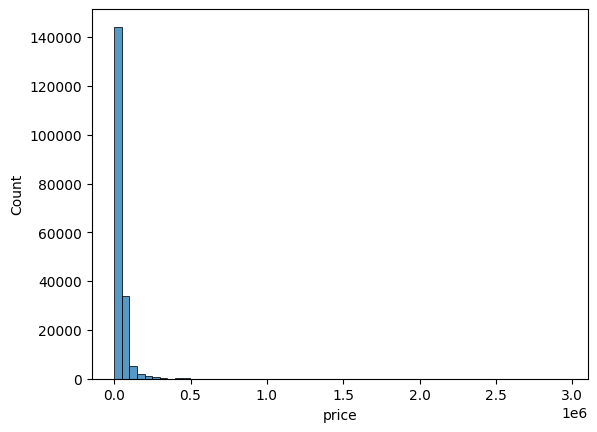

In [27]:
sns.histplot(train_df['price'], bins=60);

In [28]:
def get_outliers(target):
    q1 = train_df[target].quantile(0.25)
    q3 = train_df[target].quantile(0.75)
    IQR = q3 - q1
    lower = q1 - 1.5 * IQR
    upper = q3 + 1.5 * IQR
    ouliers = train_df[(train_df[target] < lower) | (train_df[target] > upper)][target]
    return ouliers

print(len(get_outliers(target='price'))/len(train_df))

0.05770873003665141


# Категориальные данные

In [29]:
cat_features = train_df.select_dtypes('object').columns
cat_features

Index(['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col',
       'int_col', 'accident', 'clean_title'],
      dtype='object')

## Анализ признака brand

<Axes: xlabel='brand'>

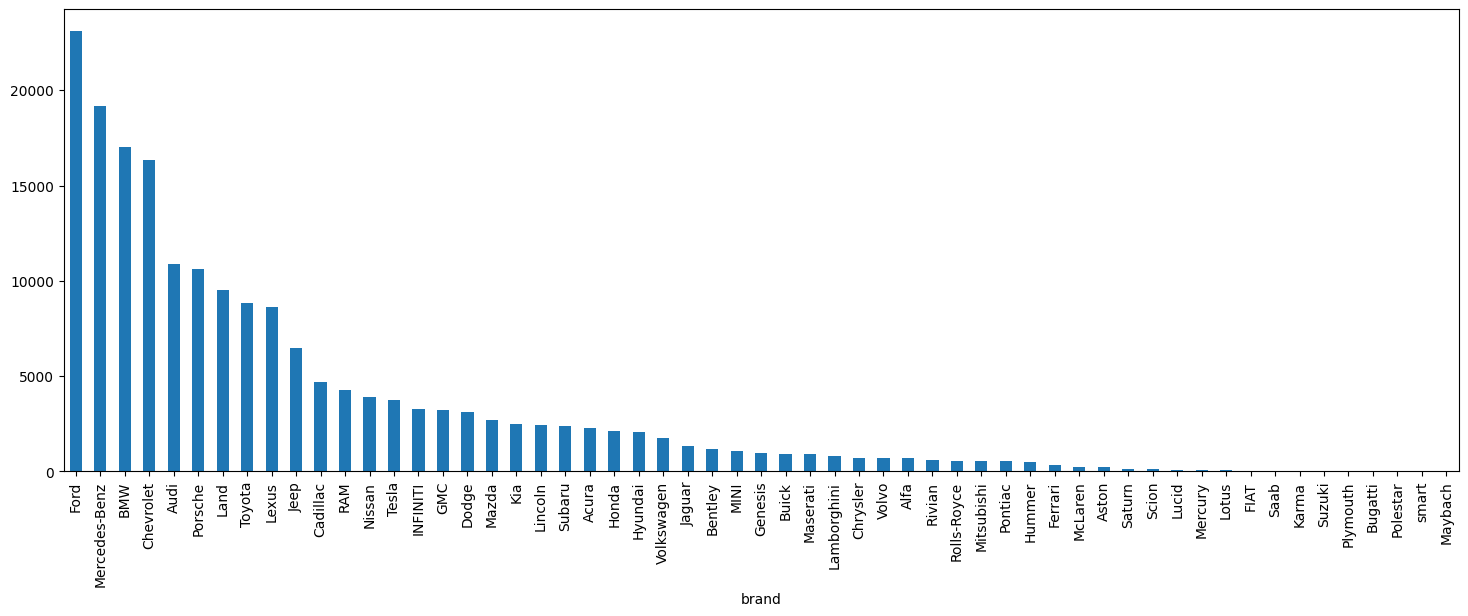

In [31]:
plt.figure(figsize=(18, 6))
train_df['brand'].value_counts().plot(kind='bar')

In [34]:
train_df.groupby("brand")['price'].mean().sort_values(ascending=False)

brand
Bugatti          169600.000000
Lamborghini      159176.012361
Rolls-Royce      135488.650624
Bentley          129272.933333
McLaren          123261.238683
Ferrari          116751.005571
Aston            112364.588235
Rivian            81089.154237
Porsche           70899.947795
Lucid             63310.362319
Maserati          61459.699681
Tesla             56445.274746
Maybach           53566.333333
Genesis           53556.327141
Land              53204.880000
Alfa              51993.095308
RAM               51290.728171
Mercedes-Benz     51244.399541
Jaguar            48147.536770
Cadillac          45659.094780
BMW               43659.775487
Chevrolet         41836.755127
Polestar          41754.857143
Audi              41004.856985
Ford              40511.969508
GMC               38936.163919
Kia               38072.465759
Karma             37384.176471
Lexus             34801.090131
smart             34664.000000
Jeep              34116.920297
INFINITI          33371.679487
Do

<Axes: xlabel='price', ylabel='brand'>

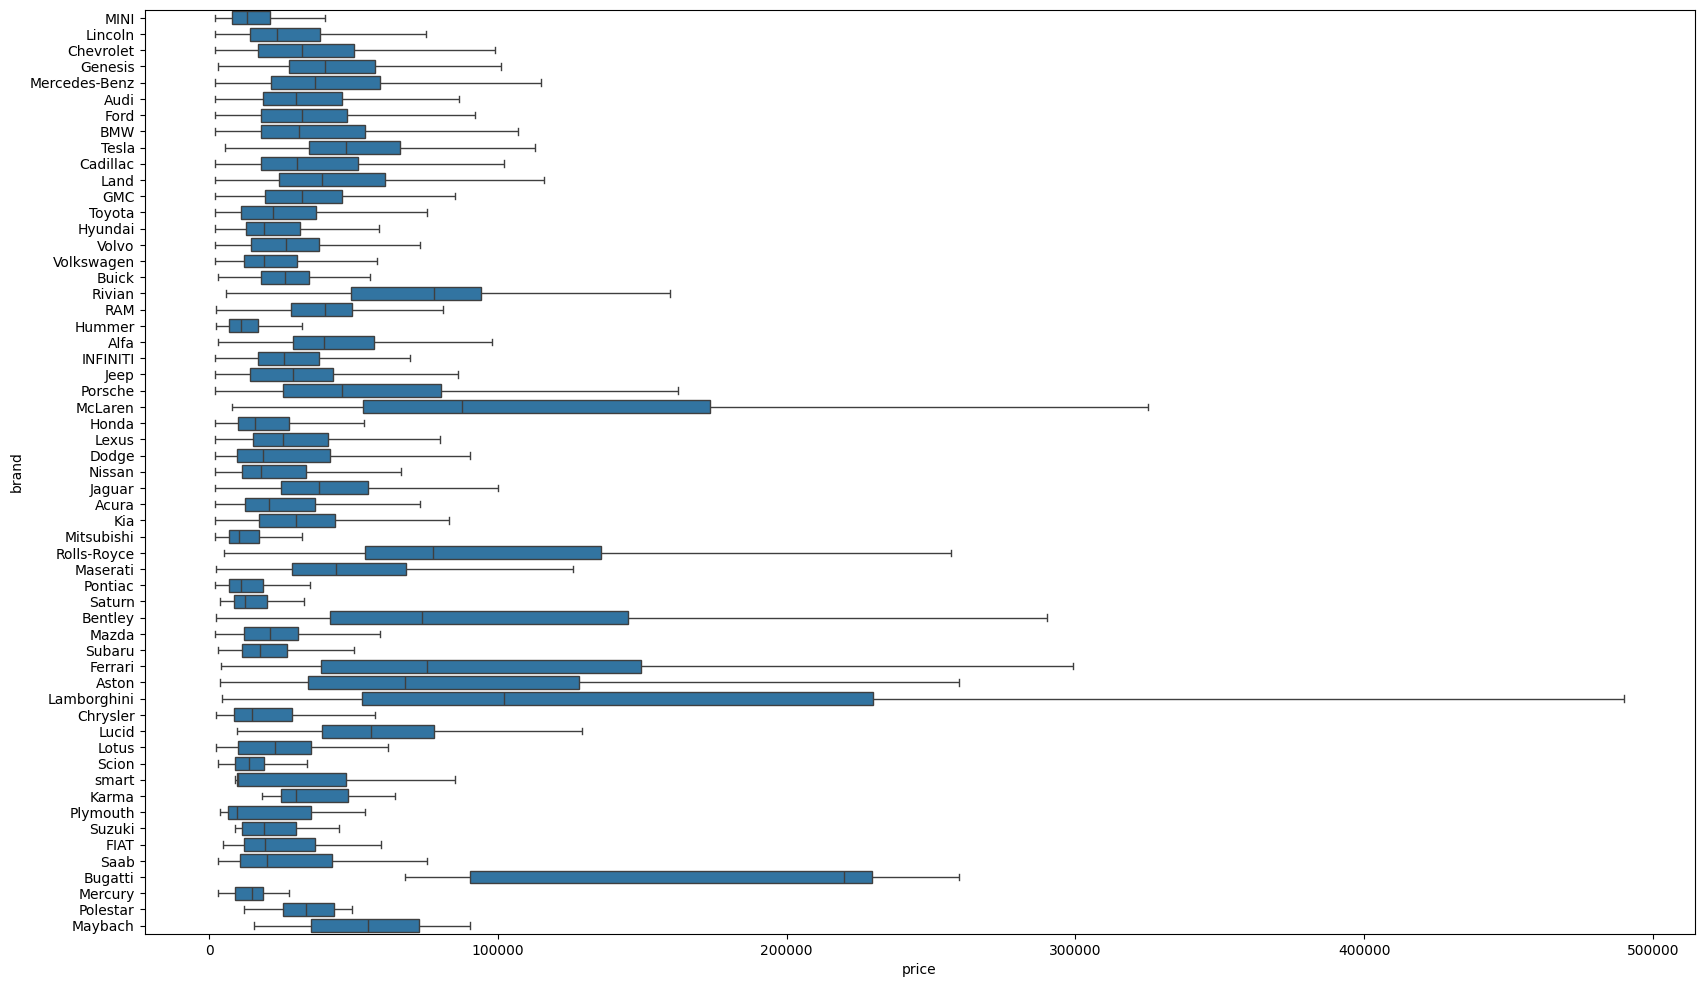

In [32]:
plt.figure(figsize=(20, 12))
sns.boxplot(data=train_df, x='price', y='brand', showfliers=False)

## Анализ признака Model

<Axes: xlabel='model'>

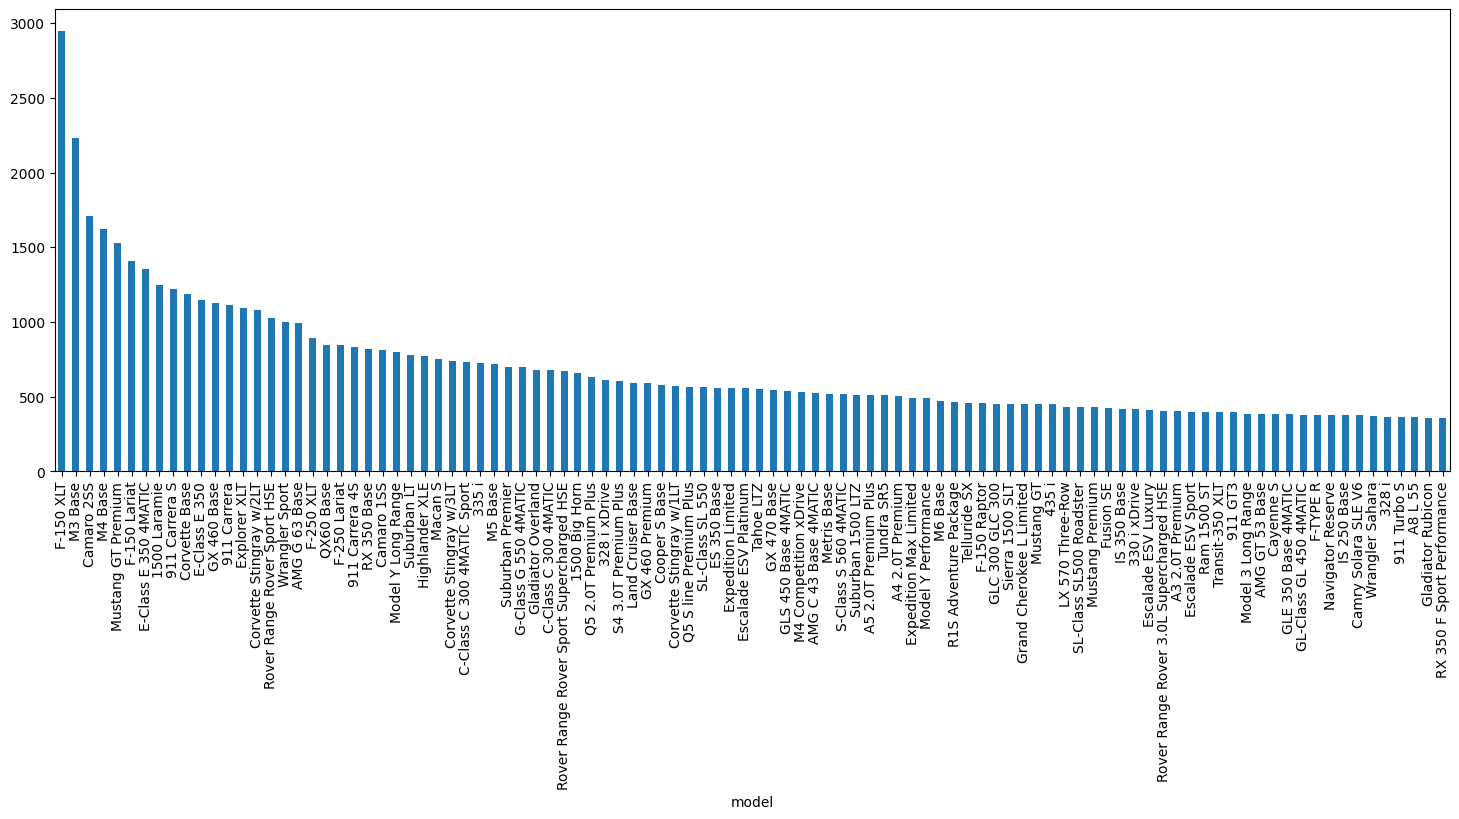

In [45]:
plt.figure(figsize=(18, 6))
train_df['model'].value_counts()[:100].plot(kind='bar')

In [81]:
train_df.groupby("model")['price'].mean().sort_values(ascending=False)

model
Carrera GT Base                    356937.250000
Gallardo SE                        265551.272727
Phantom Drophead Coupe Drophead    250358.269231
Continental GT GT Speed            244661.833333
Martin DB7 Vantage Volante         229714.312500
                                       ...      
Ram Van 1500                         8693.772727
Eurovan MV                           8245.571429
Yaris L                              8215.625000
Matrix XR                            7688.000000
Integra LS                           7683.117647
Name: price, Length: 1897, dtype: float64

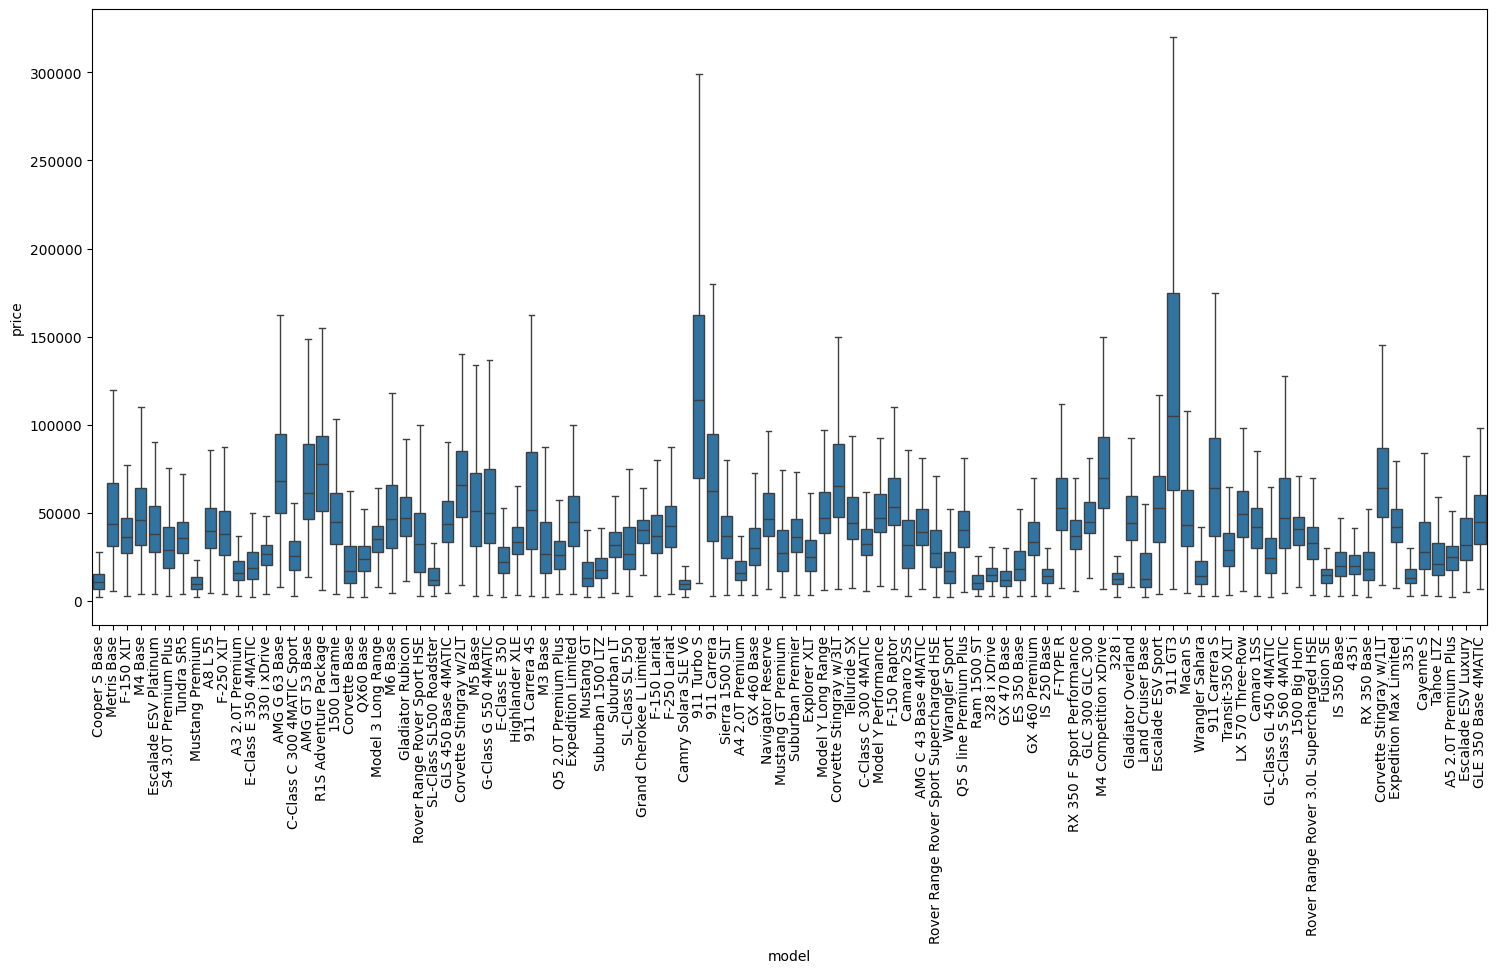

In [44]:
plt.figure(figsize=(18, 8))
most_freq_models = train_df['model'].value_counts()[:100].index
tmp_df = train_df[train_df['model'].isin(most_freq_models)]
sns.boxplot(data=tmp_df, x='model', y='price', showfliers=False)
plt.xticks(rotation=90);

## Анализ признака fuel_type

<Axes: xlabel='fuel_type', ylabel='count'>

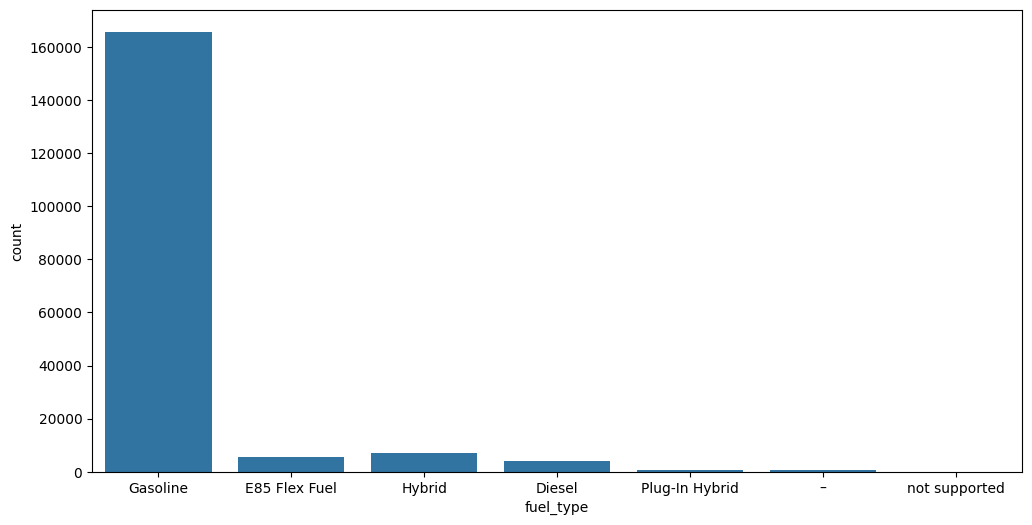

In [53]:
plt.figure(figsize=(12, 6))
sns.countplot(data=train_df, x='fuel_type')

<Axes: xlabel='fuel_type', ylabel='price'>

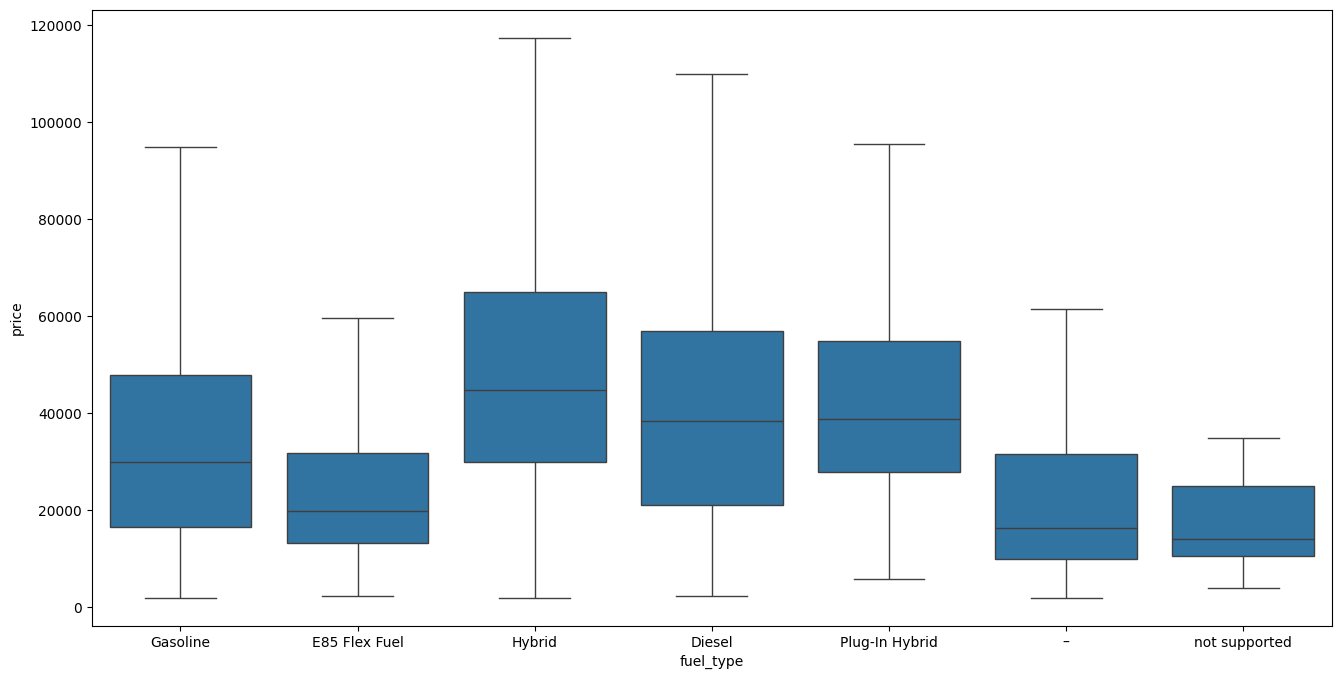

In [54]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=train_df, x='fuel_type', y='price', showfliers=False)

## Анализ признака transmission

<Axes: xlabel='transmission'>

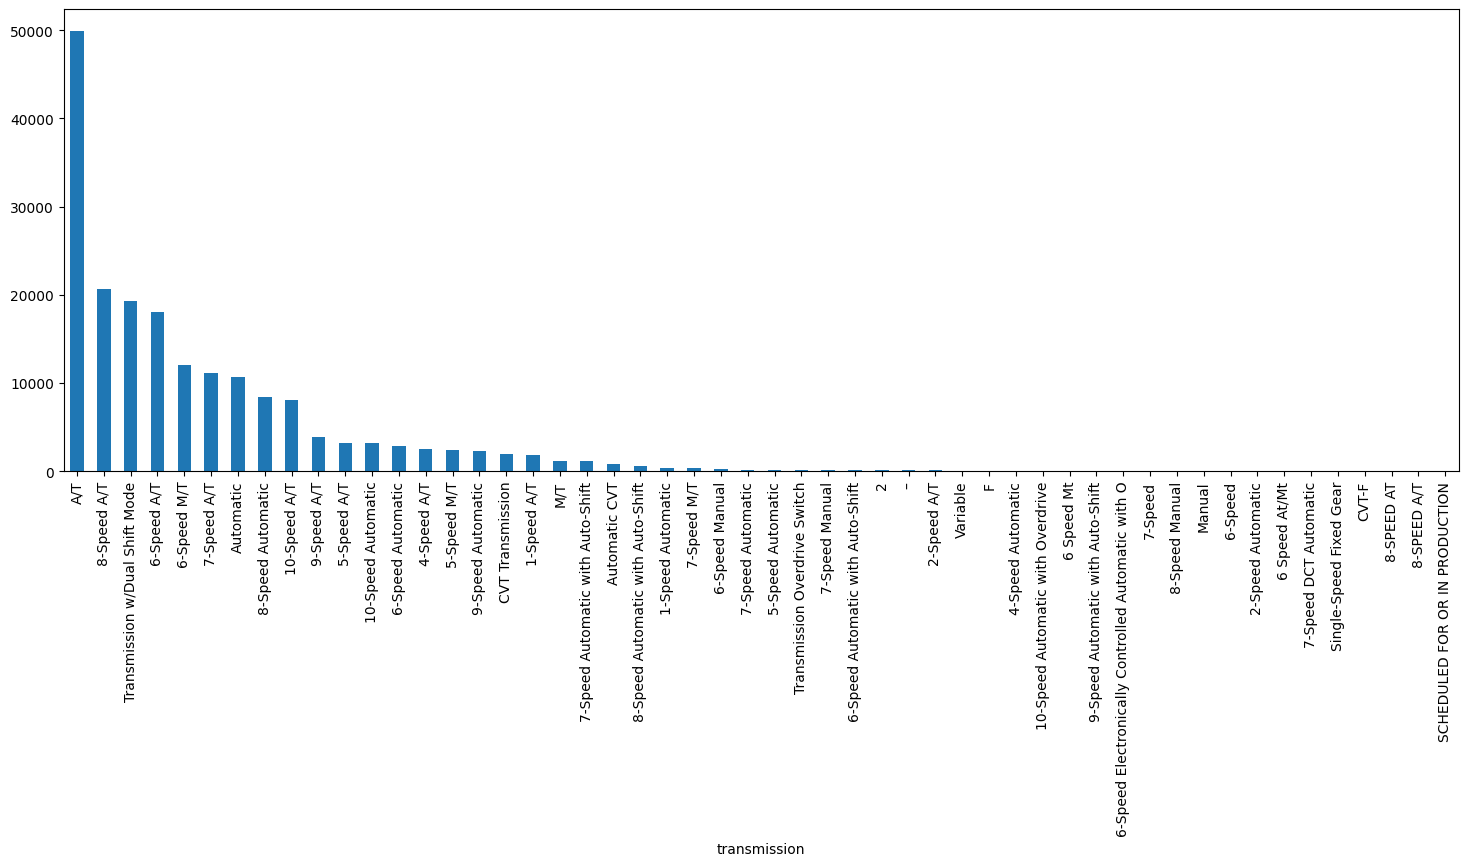

In [55]:
plt.figure(figsize=(18, 6))
train_df['transmission'].value_counts().plot(kind='bar')

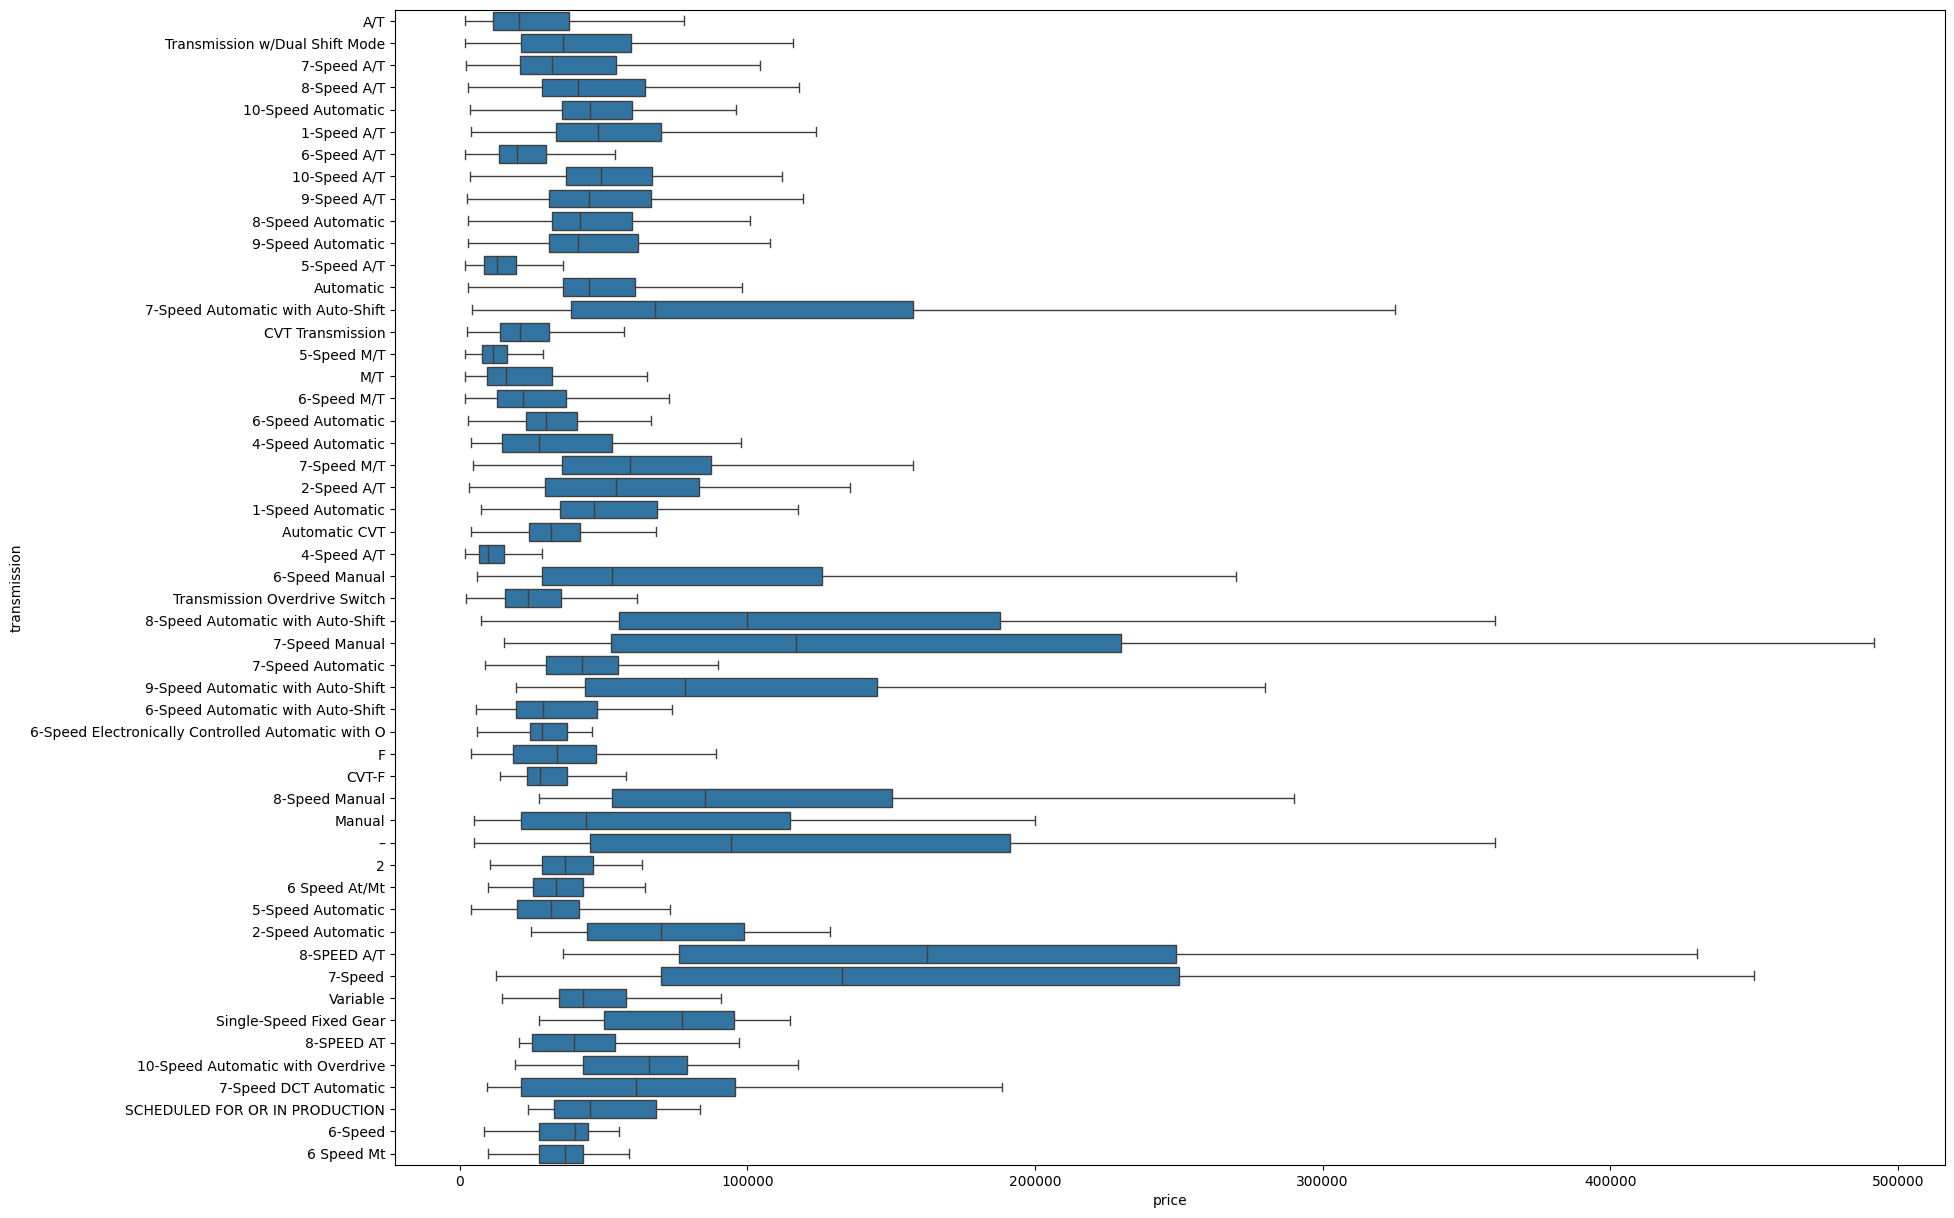

In [57]:
plt.figure(figsize=(20, 15))
sns.boxplot(data=train_df, x='price', y='transmission', showfliers=False);

## Анализ признака ext_col

<Axes: xlabel='ext_col'>

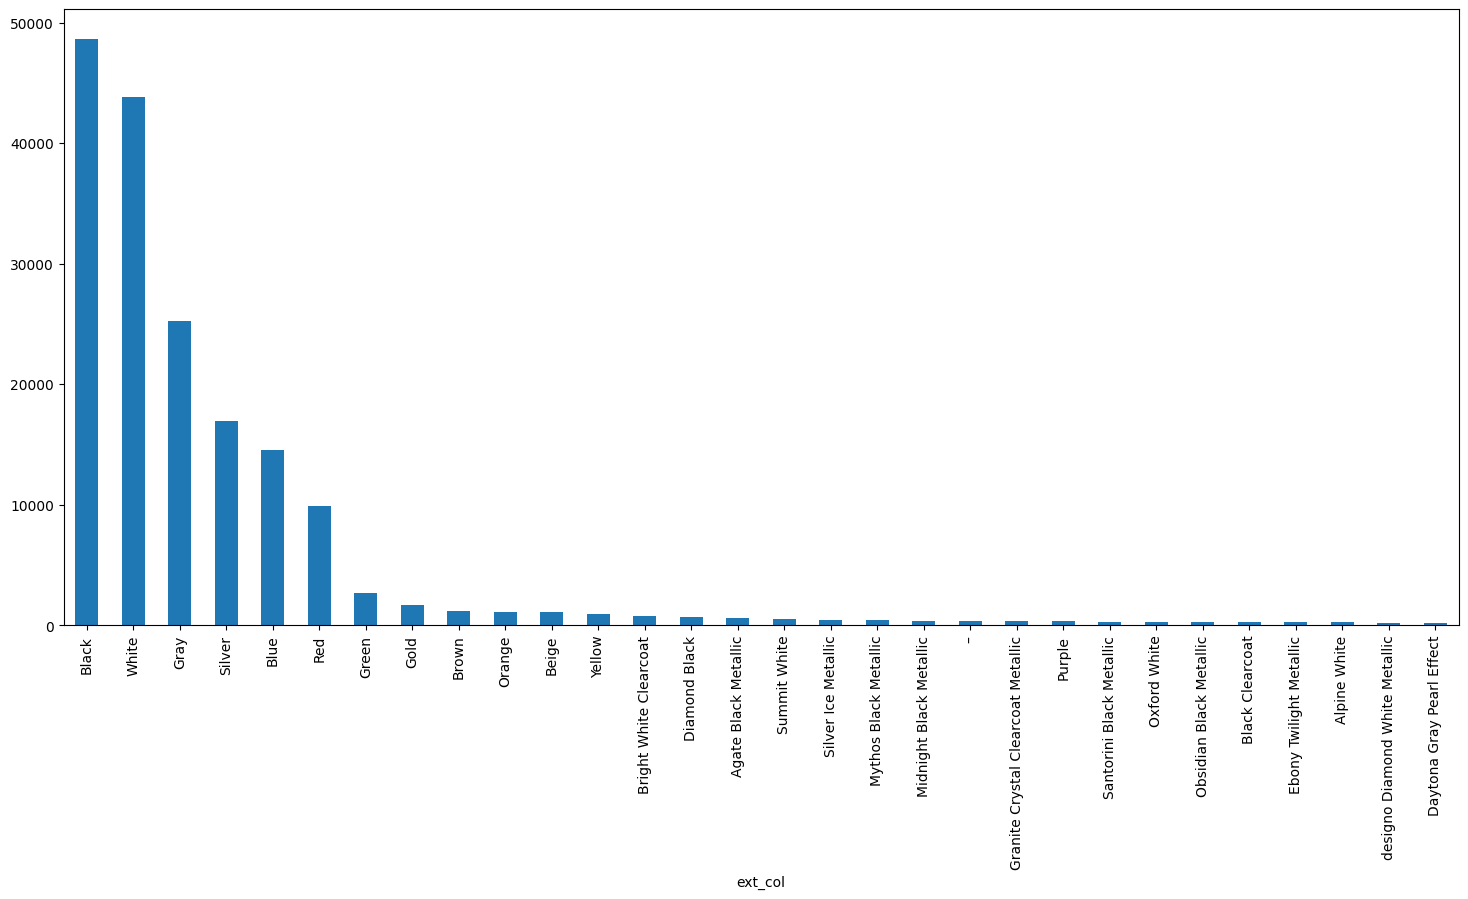

In [58]:
plt.figure(figsize=(18, 8))
top_30_ext_col = train_df['ext_col'].value_counts()[:30].index
train_df['ext_col'].value_counts()[:30].plot(kind='bar')

In [63]:
train_df.groupby("ext_col")['price'].mean().sort_values(ascending=False)

ext_col
Blue Caelum              396263.600000
Dark Sapphire            355541.454545
Bianco Monocerus         300063.076923
C / C                    292528.088235
Ice                      288203.272727
                             ...      
Mountain Air Metallic     28121.000000
Volcanic Orange           26912.000000
Beige                     25639.143514
Frozen White              25339.000000
Gold                      23090.873501
Name: price, Length: 319, dtype: float64

<Axes: xlabel='price', ylabel='ext_col'>

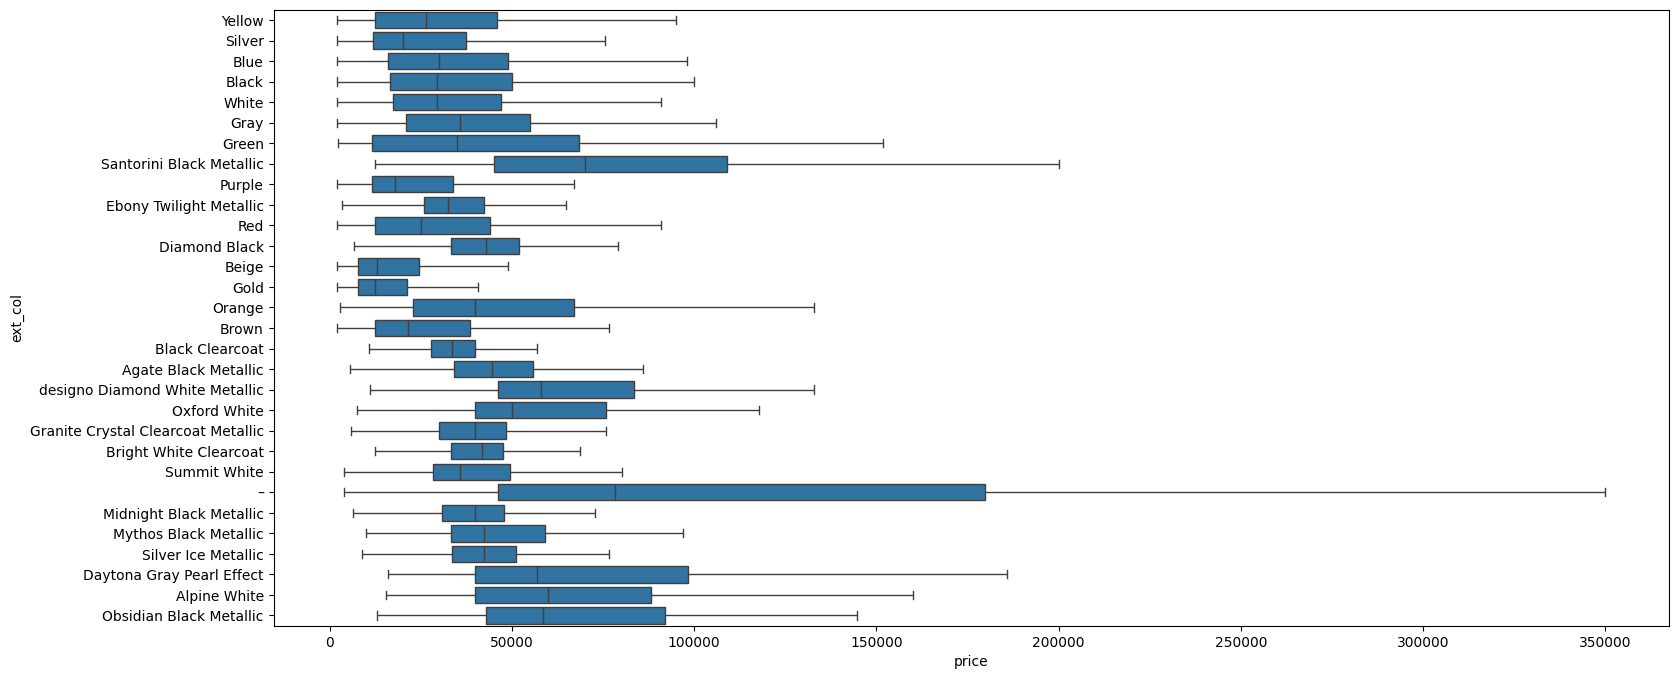

In [59]:
plt.figure(figsize=(18, 8))
sns.boxplot(data=train_df[train_df['ext_col'].isin(top_30_ext_col)], x='price', y='ext_col', showfliers=False)

## Анализ признака int_col

<Axes: xlabel='int_col'>

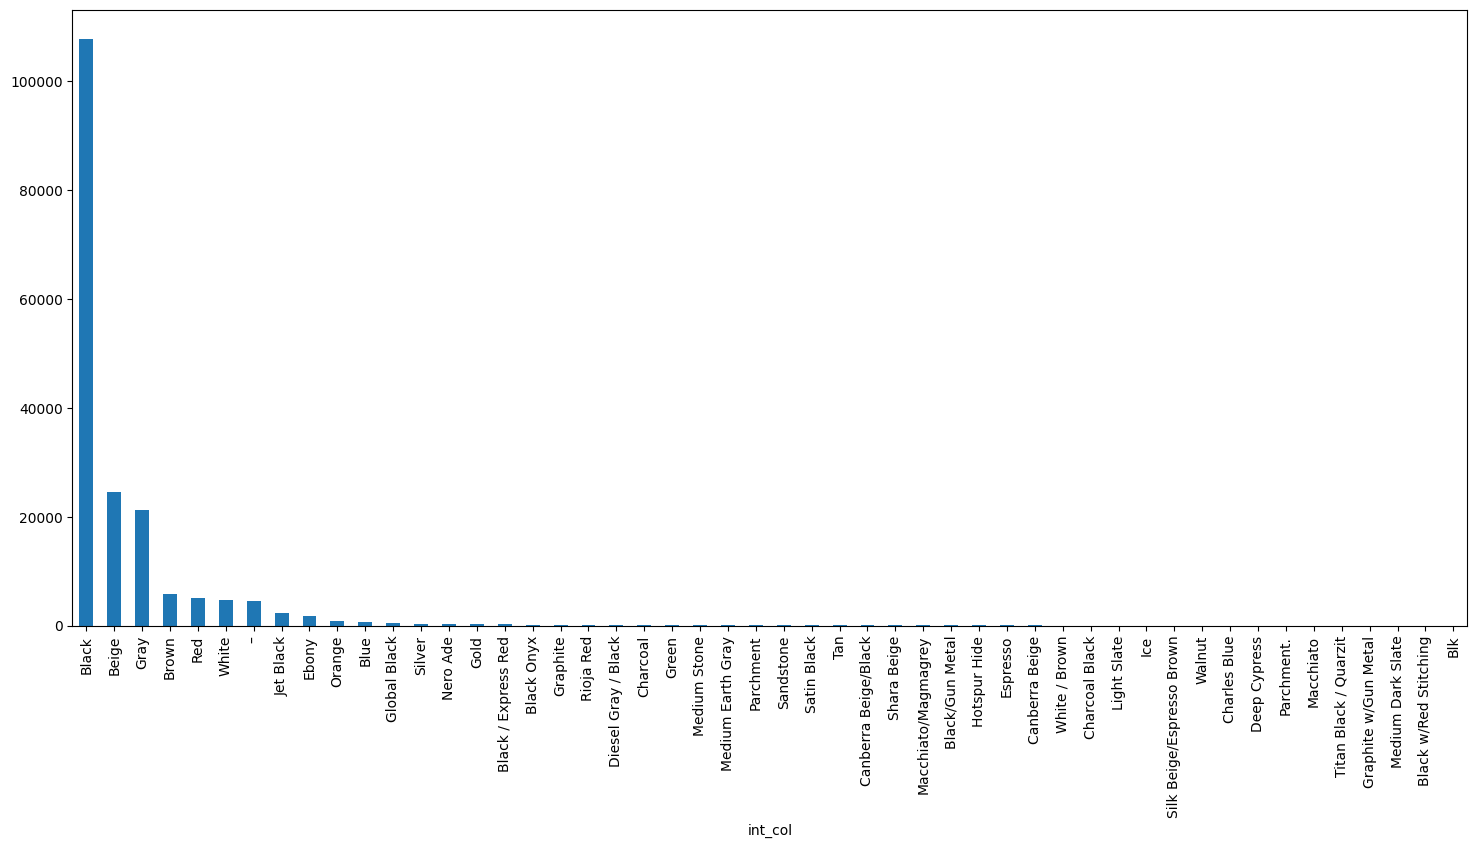

In [66]:
plt.figure(figsize=(18, 8))
train_df['int_col'].value_counts()[:50].plot(kind='bar')

In [70]:
train_df.groupby("int_col")['price'].mean().sort_values(ascending=False)

int_col
Dark Auburn        268591.333333
Hotspur            257780.844444
Cobalt Blue        249600.666667
Beluga Hide        233563.625000
Linen              224166.555556
                       ...      
Medium Ash Gray     31039.727273
Beige               29953.997428
Medium Pewter       29307.571429
Gray                28182.418129
Light Gray          26538.250000
Name: price, Length: 156, dtype: float64

<Axes: xlabel='price', ylabel='int_col'>

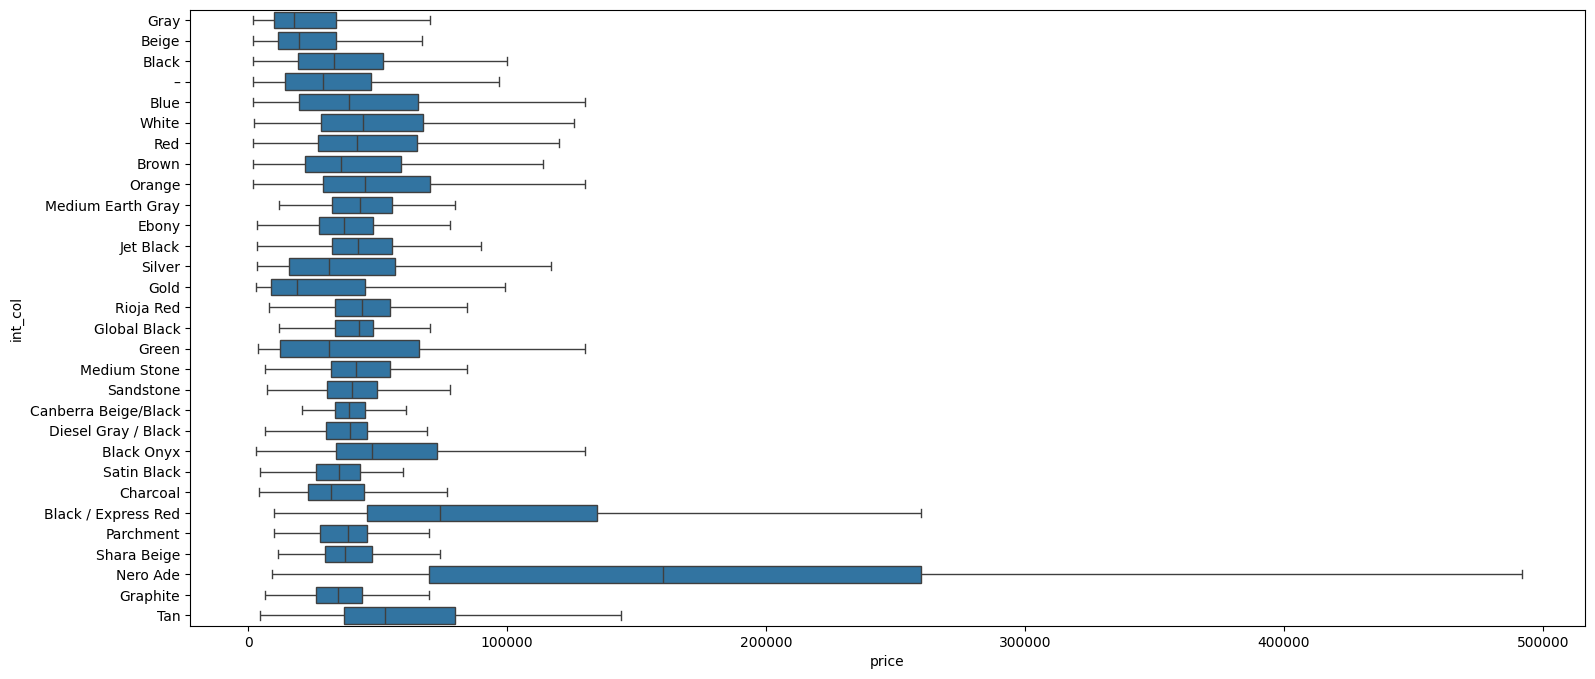

In [67]:
plt.figure(figsize=(18, 8))
top_30_int_col = train_df['int_col'].value_counts()[:30].index
sns.boxplot(data=train_df[train_df['int_col'].isin(top_30_int_col)], x='price', y='int_col', showfliers=False)

## Анализ признака accident

<Axes: xlabel='accident', ylabel='count'>

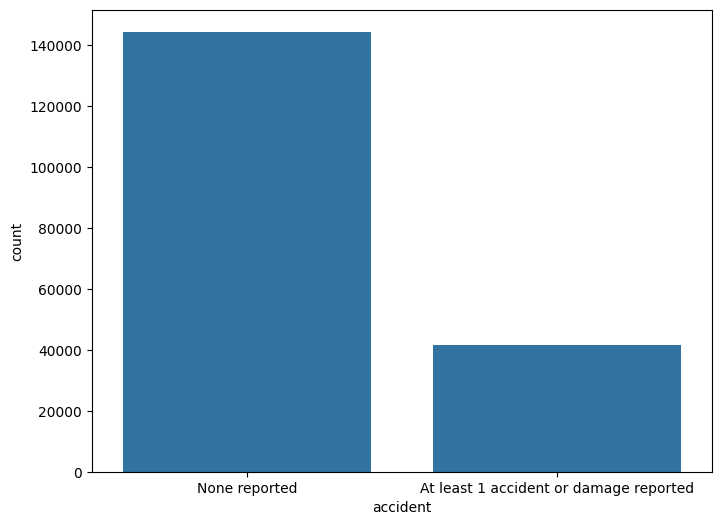

In [73]:
plt.figure(figsize=(8, 6))
sns.countplot(data=train_df, x='accident')

<Axes: xlabel='accident', ylabel='price'>

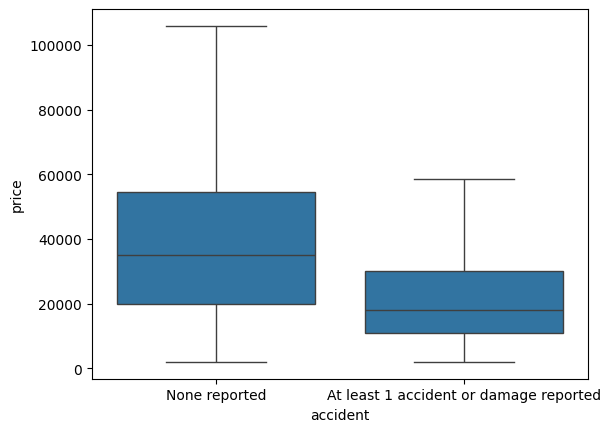

In [74]:
sns.boxplot(data=train_df, x='accident', y='price', showfliers=False)

## Анализ признака clean_title

<Axes: xlabel='clean_title', ylabel='count'>

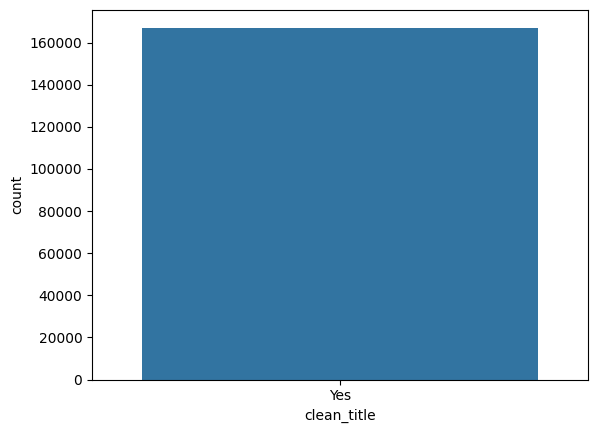

In [75]:
sns.countplot(data=train_df, x='clean_title')

# Количественные признаки

In [76]:
train_df.select_dtypes(['int', 'float']).columns

Index(['id', 'model_year', 'milage', 'price'], dtype='object')

## Анализ признака model_year

<Axes: xlabel='model_year', ylabel='price'>

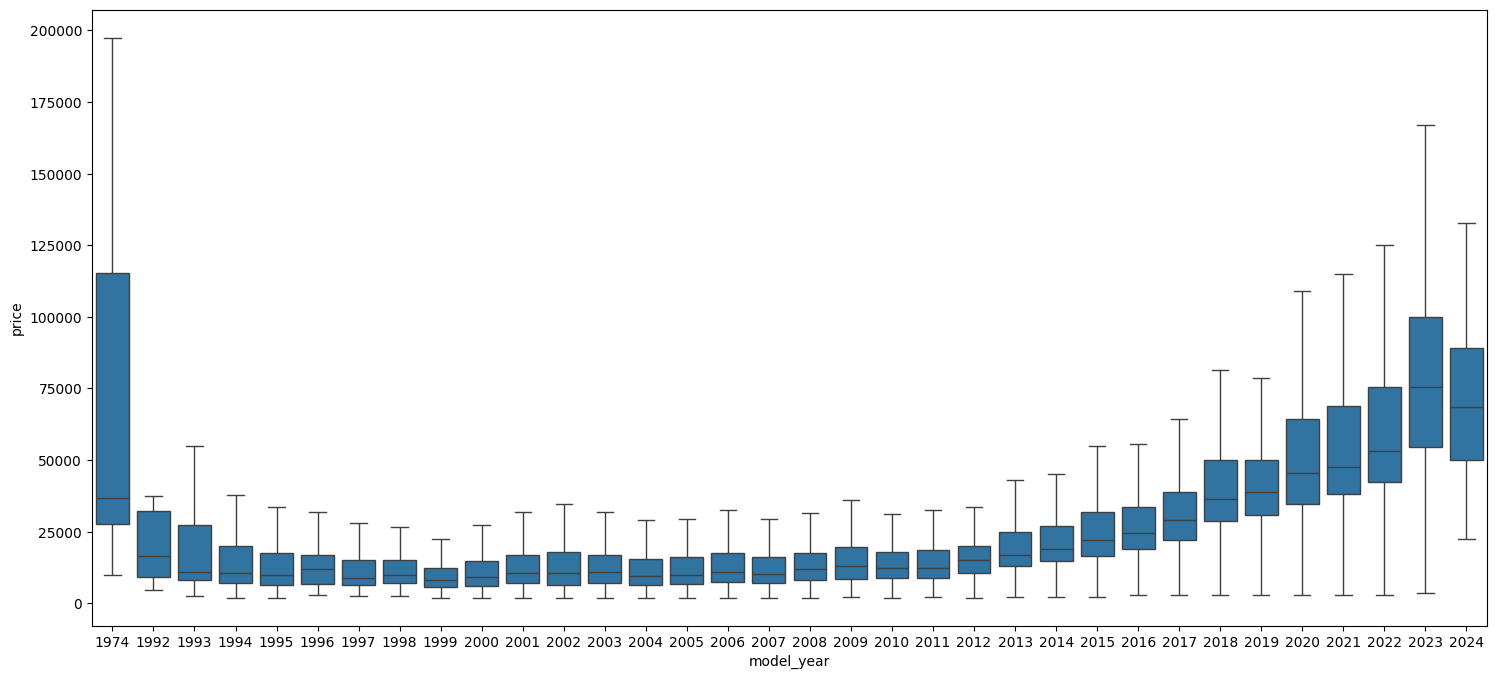

In [78]:
plt.figure(figsize=(18, 8))
sns.boxplot(data=train_df, x=train_df['model_year'], y=train_df['price'], showfliers=False)

## Анализ признака milage

<Axes: xlabel='milage', ylabel='price'>

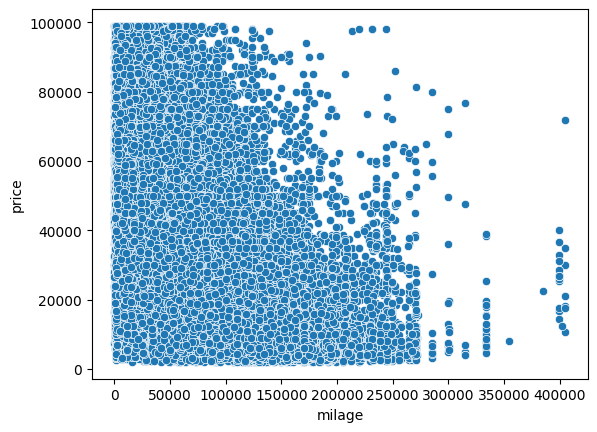

In [82]:
outliers = get_outliers(target='price').values
df_without_outliers = train_df[~train_df['price'].isin(outliers)]
sns.scatterplot(data=df_without_outliers, x='milage', y='price')

<Axes: >

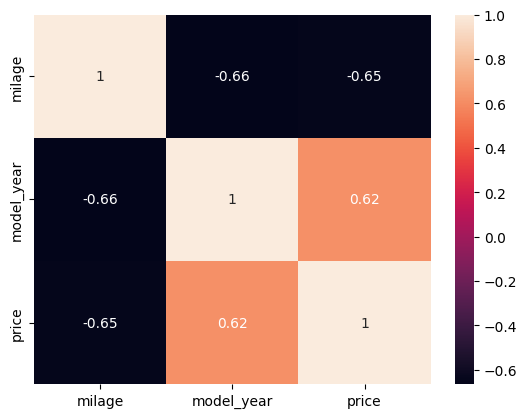

In [83]:
sns.heatmap(df_without_outliers[['milage', 'model_year','price']].corr(), annot=True)

Основные идеи для предобработки данных:

- Удаление нерелеватных признаков таких как id и clean_title
- Извлечение признаков из engine таких как количество лошадиных сил, объем двигателя, количество цилиндров
- Извлечение скорости из признака transmission
- Создание новых признаков на основе стоимости дорогих моделей и брендов (is_luxuray_model, is_luxuary_brand)
- Кодирование признаков brand, model с помощью TargetEncoder
- Кодирование цветов с помощью BinaryEncoder
- Заполнение пропусков с помощью KNN
- Логорифмирование таргета, которое позволит привести распределение близко к нормальному
- Замена признака model_year на количество лет машине (age) от текущего года (2025 год)
